## Introduction
The banking and finance industries are facing new and unique business challenges brought on by low cash rate, COVID-19 economic impacts, expanded regulatory oversight, and higher consumer expectations. Hence, large organizations need to optimize their business processes, control expenses, and increase revenue to successfully competes in the marketplace. One of the most common practices in the finance industry is to run a marketing campaign for cross-selling (marketing additional products to existing customers) or to attract new clients. There are different type of marketing campaigns for example some marketing campaigns are based on phone calls. The main question is how to identify and contact right customers for cross-selling? Sometimes clients are not financially able to obtain the new products or there is no need for a such a product. Therefore, to optimise the efforts, right clients must be identified and be contacted. This question can be answered by using Machine Learning. Our focus in this research is on phone-based marketing campaigns for cross-selling products.

By developing a predictive model, we can identify the right customers to be contacted and help the banks to optimise their marketing efforts and increase their profit.

The majority of my employment background is in banking industry and I have a firsthand experience in this type of marketing campaigns. This predictive model with a high accuracy can help a bank to optimise their efforts and channel their marketing campaign in a right direction.


Machine Learning is significantly improving the way an organization conducts business and makes decisions. In order to build a predictive model, various supervised machine learning algorithms will be utilized.



## Literature Review
Supervised machine learning techniques have been used in variety of research works. In this project, the real-world data from a banking institution in Portugal (Banco de Portugal) is used. Moro et al. (2011) used the same dataset to classify the clients, increase the campaign efficiency and the success rate of telemarketing for the bank. The researchers evaluated the Support Vector Machine (SVM), Decision Tree (DT) and Naive Bayes classification accuracies. The performance of the classifiers was measured by the Receiver Operator Characteristics (ROC) curve. The results showed that the SVM produces the most accurate model. The rattle tool in R software was used for the feature selection in this research. The results showed that Call duration was the most relevant feature which indicates that longer calls could increase the success rate. The second most important feature was the month of contact and it was showed that the probability of success will be higher if a campaign occurs in the last month of each trimester (March, June, September and December). The other most important independent variables are number of contacts, days since last contact, last contact result and first contact duration attributes respectively. In another study, Moro et al. (2014), a data set with 150 attributes was used and the success of bank telemarketing was modelled by Logistic Regression (LR), Decision Tree, Support Vector Machine and Neural Network (NN). The result showed that neural network yielded to the most accurate prediction.


Grzonka et al. (2016) used the same dataset and applied decision trees, bagging, boosting, and random forests classifiers. Considering the full set of data, the Gini index was utilized to determine the most significant attributes. They showed that the most significant attribute was the duration of a call but in reality, this independent variable is known only after performing a direct marketing operation. Hence the parameter was omitted in this research. The researchers used pOutcome (outcome of the previous marketing campaign) Month, Job, Age, Balance Education, Campaign, Marital attributes as their predictors. Compared Moro et al. (2011) this approach had a negative impact on the performance of Classifiers. In the reduced attributes scenario, the analyses indicated that the most significant parameter is the effectiveness of previous campaigns. The confusion matrices and misclassification errors were used to evaluate the accuracy of the classifiers. The best performance was obtained for random forests and the highest percentage of true positive classifications was obtained for a single decision tree.

## Problem statement
Banco de Portugal, a banking institution in Portugal, offered their clients a term deposit through a phone-based marketing campaign. Data was collected about client details, phone call details, and the results. The main question is if we can improve future marketing campaigns by analysing past marketing campaign data and recommending which customer to target. The purpose of this project is to predict if the client on call would accept to make a term deposit or not based on the information of the clients. The input variables will be out client personal details (such as age,education,job), client financial details (such as account balance, loans) and the details of the last contact of the current campaign (such as day,month,duration,outcome. The outcome is binary, whether the client has subscribed a term deposit or not.

## Dataset
The data is related with direct marketing campaigns of a Portuguese banking institution. This dataset is publicly available for research. The full dataset was described and analysed in:
[Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. 

In [83]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("bank.csv" ,  sep=";")

In [3]:
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


10 columns are object and 7 are int64. The Int64 columns are: age, balance, day. duration, campaign, pdays, previous, and previous. The object columns are job, martial, education, default, housing, loan, contact, month, poutcome, and y .

In [5]:
df.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df_dup = df[df.duplicated(keep="last")]
df_dup

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


## checking imbalance 

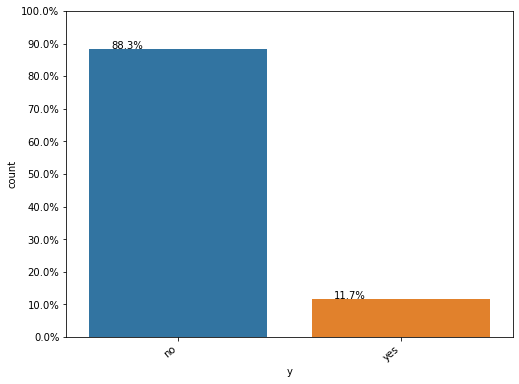

In [8]:
# Check imbalance plot percentage
plt.figure(figsize=(8,6))
Y = df["y"]
total = len(Y)*1.
ax=sns.countplot(x="y", data=df)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
    
#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# ax.legend(labels=["no","yes"])
plt.show()

In [9]:
# Check imbalance counts
print(df["y"].value_counts())

no     39922
yes     5289
Name: y, dtype: int64


There are 39,922 “no” which is about 88.3% of the data and only 5,289 “yes” which is 11.7% “of the data so the dataset is imbalanced.

###  Univariate Analysis of Categorical variables:

In [10]:
# Create Count Plots of each feature to find out the class distribution for each feature. 
#define a function to plot the count plots
def countplot(label, dataset):
  plt.figure(figsize=(15,10))
  Y = df[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=df)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

In [11]:
%matplotlib inline

def countplot_withY(label, dataset):
  plt.figure(figsize=(20,10))
  Y = df[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=df, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

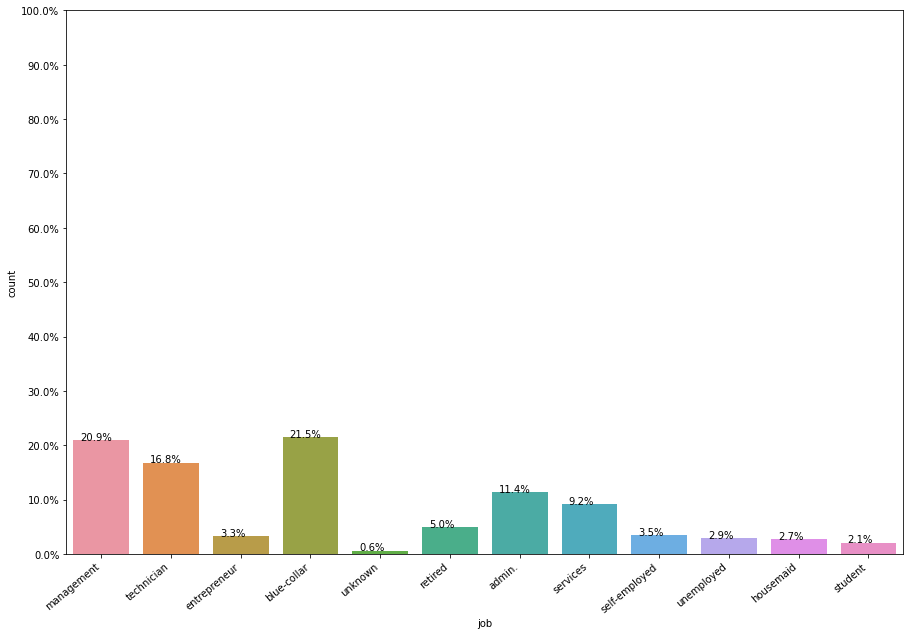

In [12]:
countplot("job", df)

Based on the above distribution, 21.5% of our customers are "blue-collar" and 20.9% have a management job.How many people who work as an admin have subscribed a term deposit?

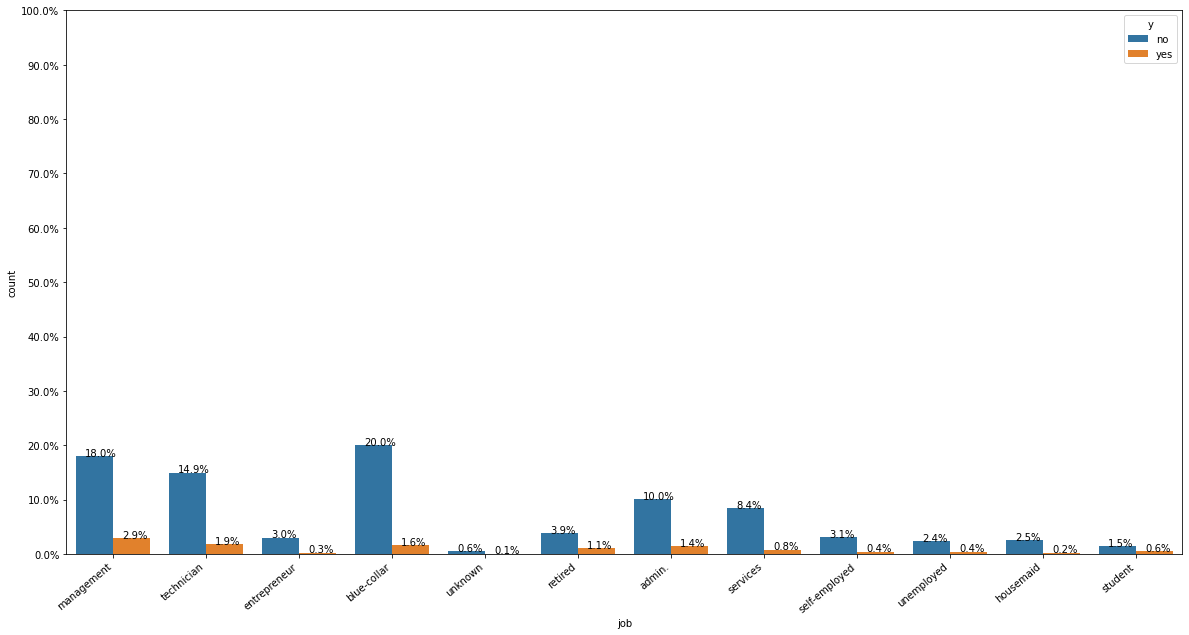

In [13]:
countplot_withY("job", df)

The highest success rate belongs to customers who has a management job , which make sense as they are busy professional and the tendency to accept a deal over the phone could be higher between them. The second highest success rate belongs to technician , again they are busy people. the lowest success rate belongs to housemaid , unemployed and self-employed people. 

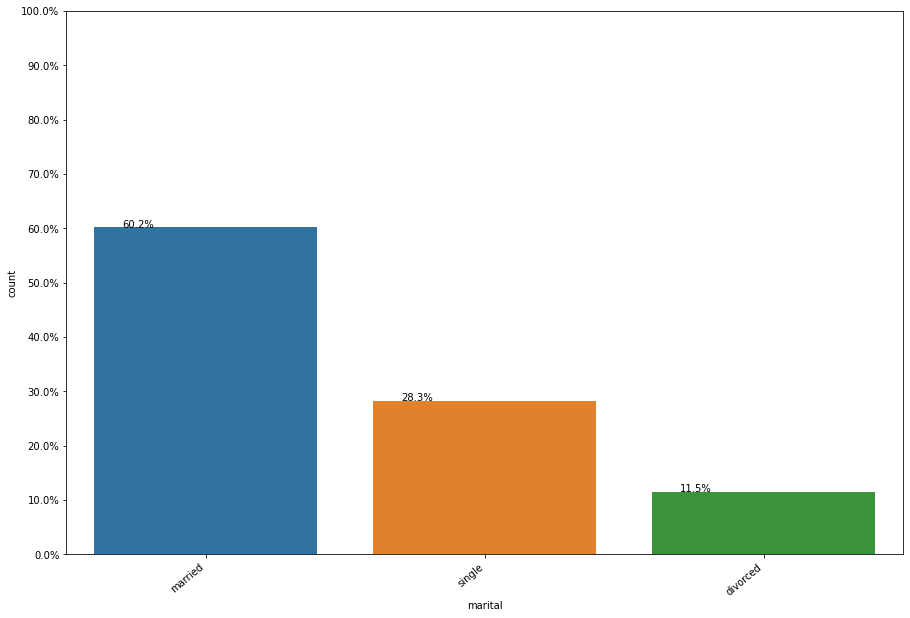

In [14]:
countplot("marital", df)

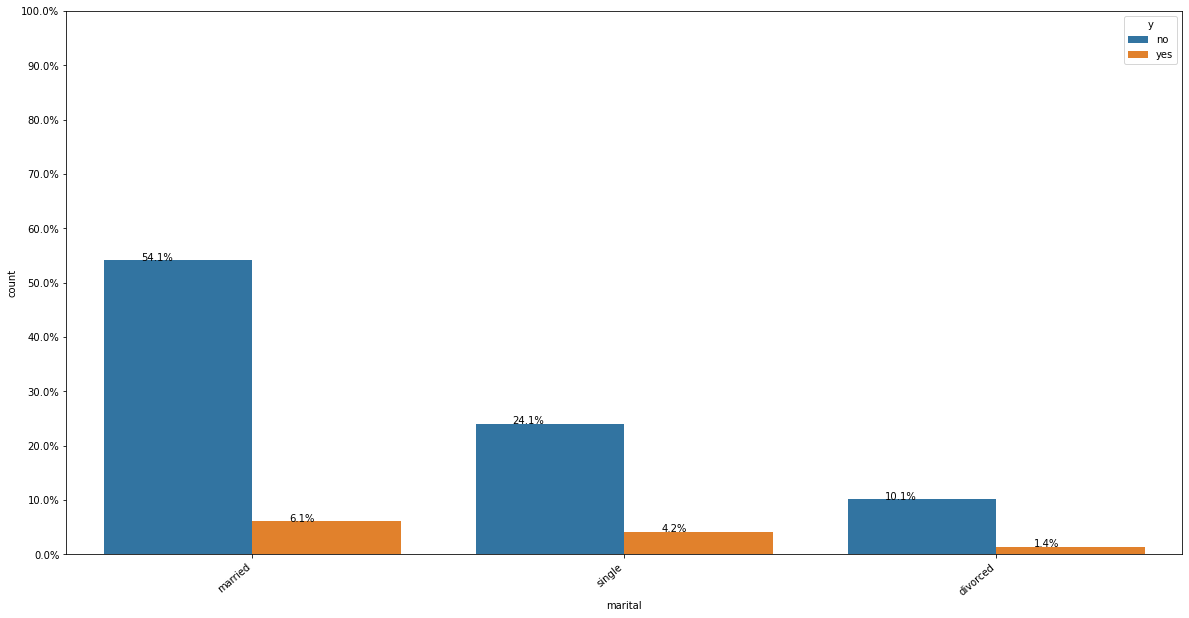

In [15]:
countplot_withY("marital", df)

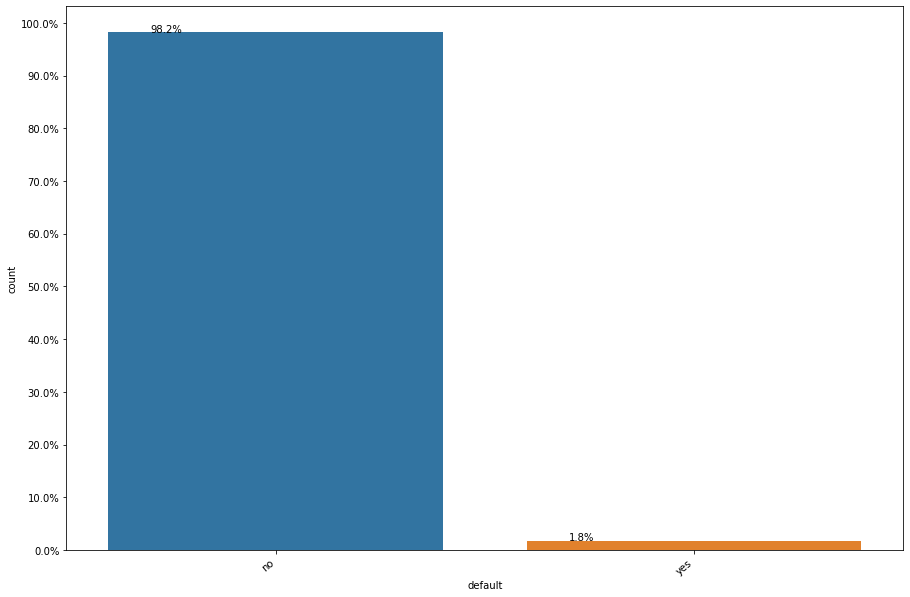

In [16]:
countplot("default", df)

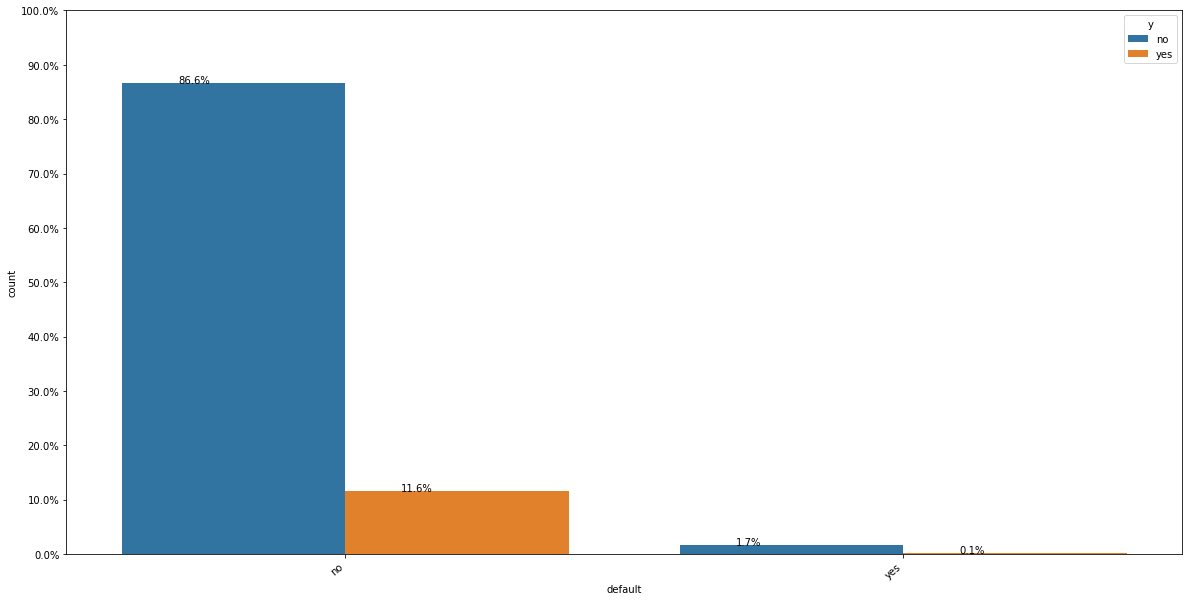

In [17]:
countplot_withY("default", df)

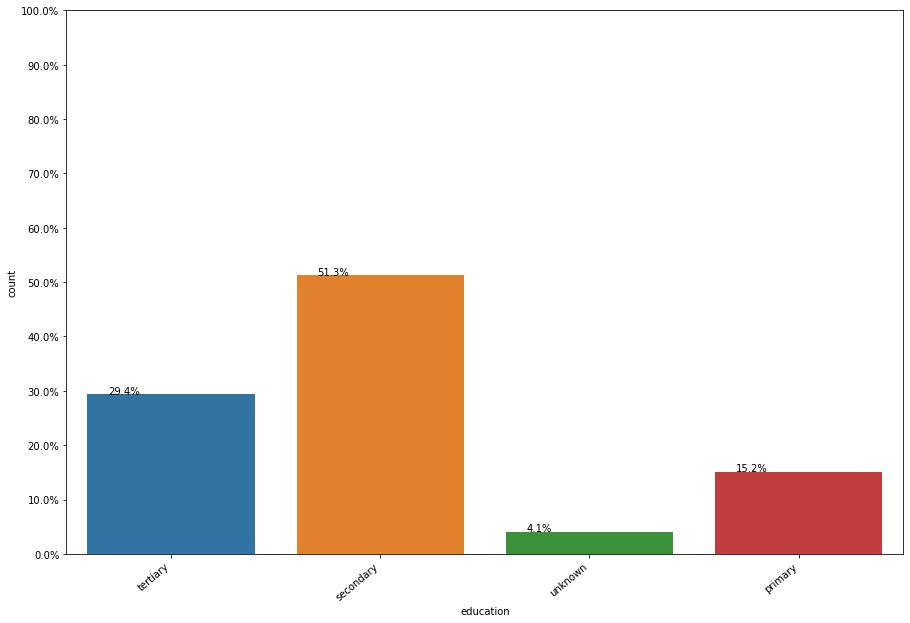

In [18]:
countplot("education",df)

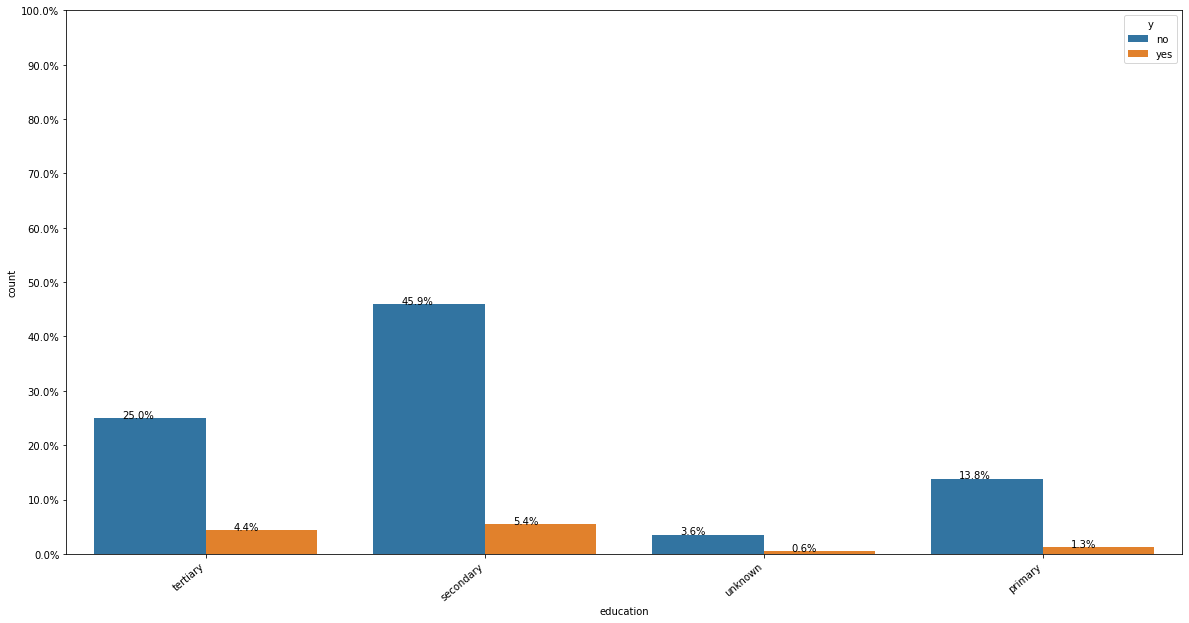

In [19]:
countplot_withY("education", df)

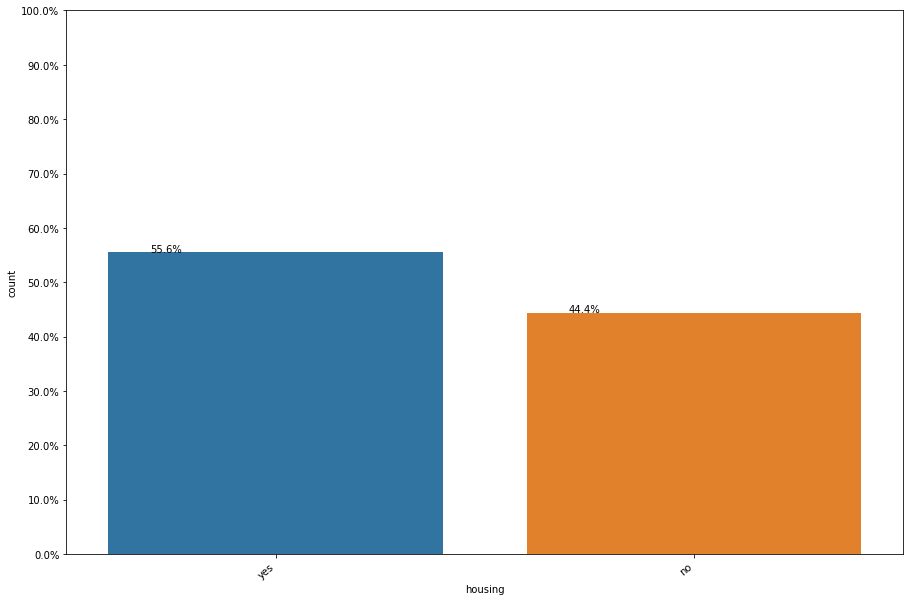

In [20]:
countplot("housing", df)

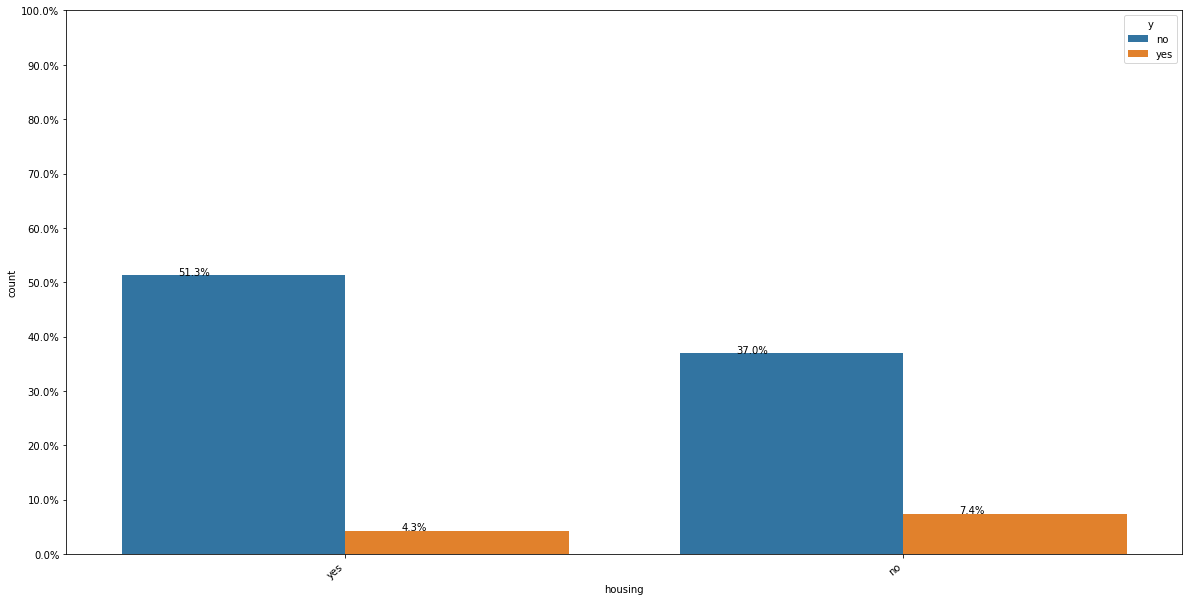

In [21]:
countplot_withY("housing", df)

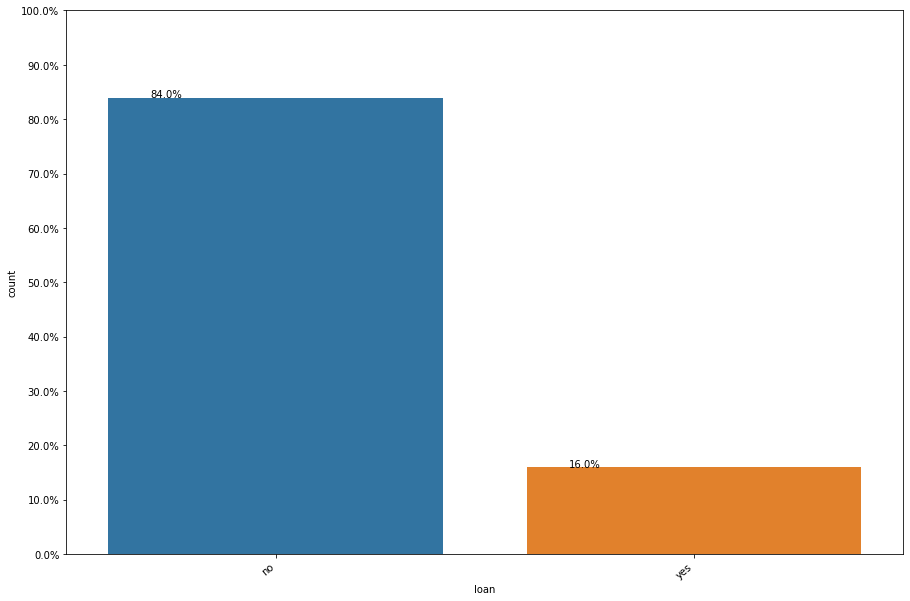

In [22]:
countplot("loan", df)

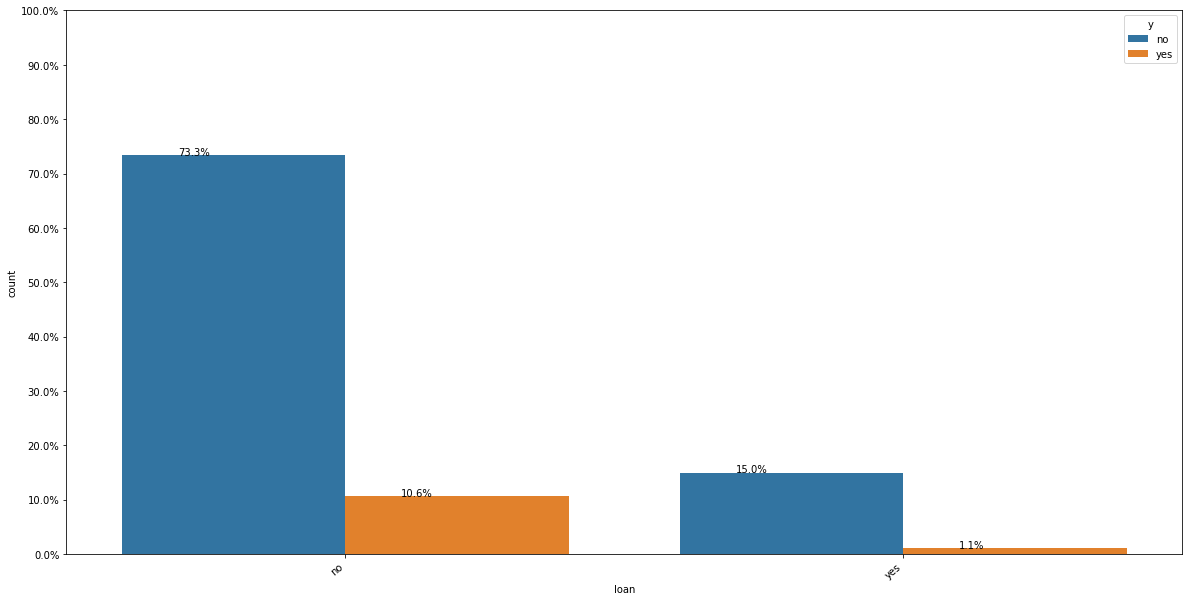

In [23]:
countplot_withY("loan", df)

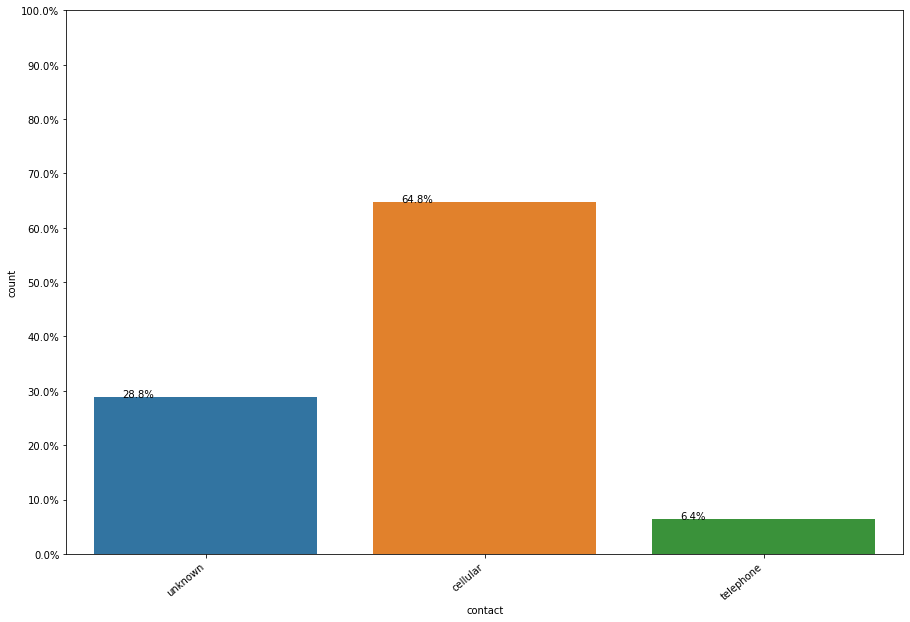

In [24]:
countplot("contact", df)

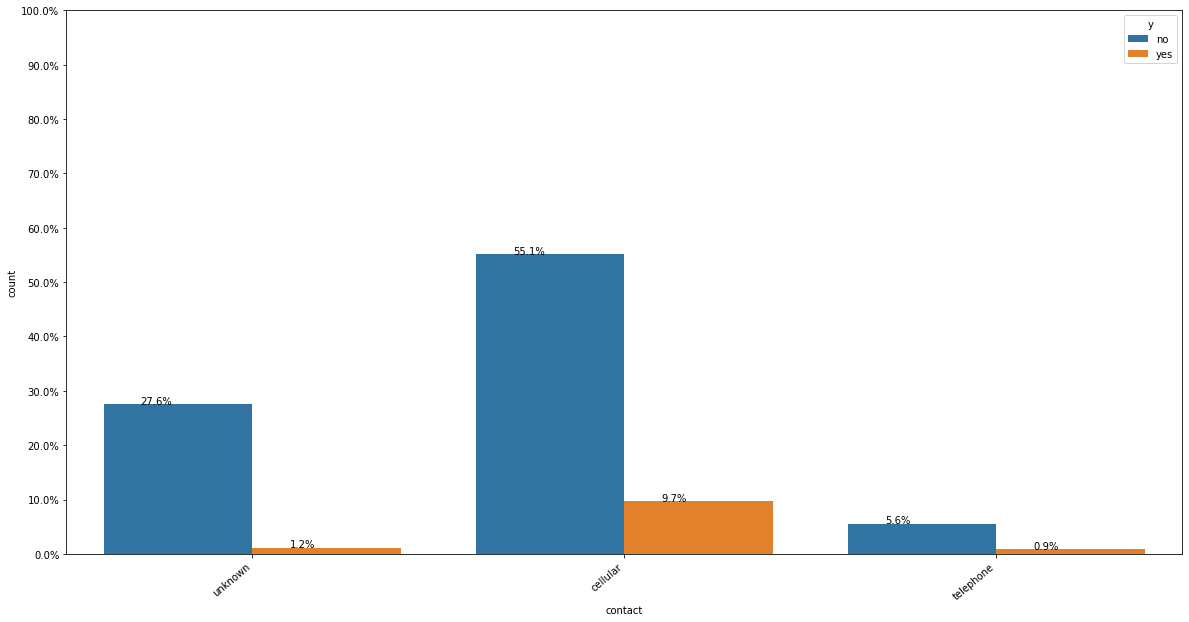

In [25]:
countplot_withY("contact", df)

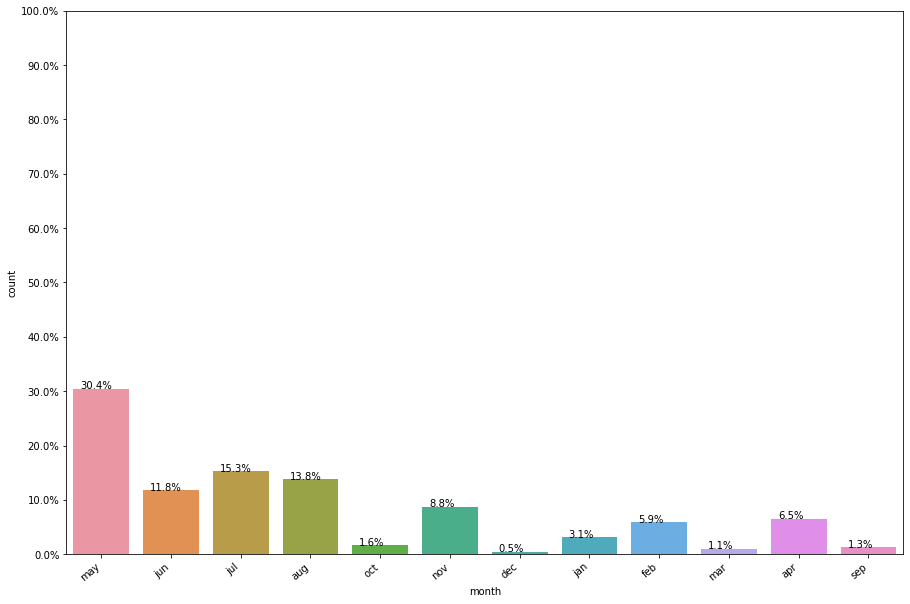

In [26]:
countplot("month", df)

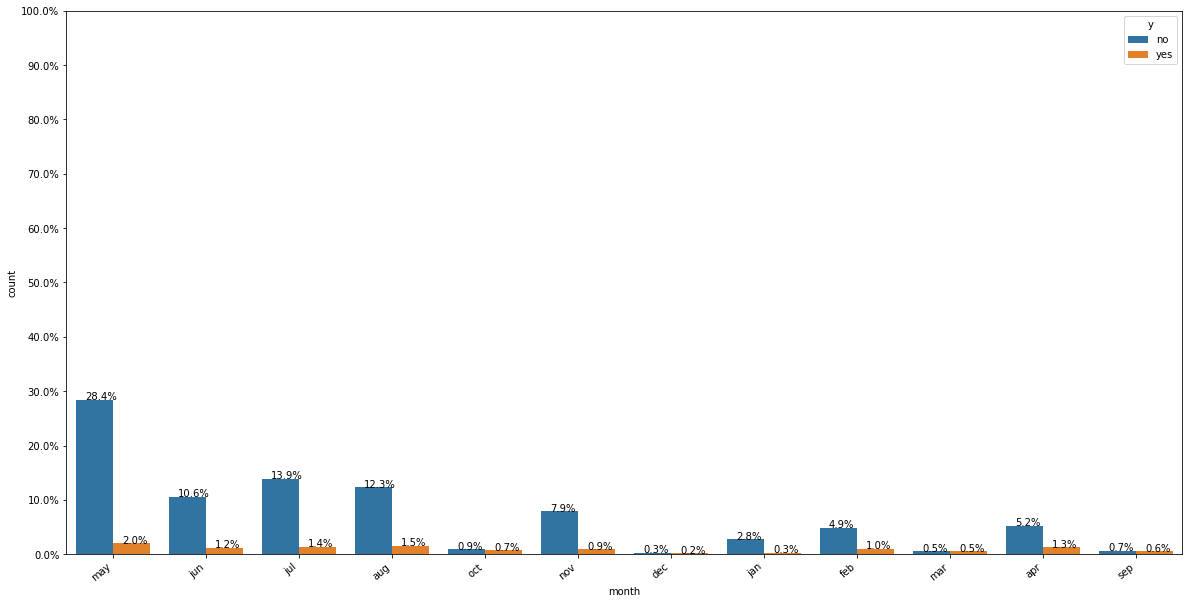

In [27]:
countplot_withY("month", df)

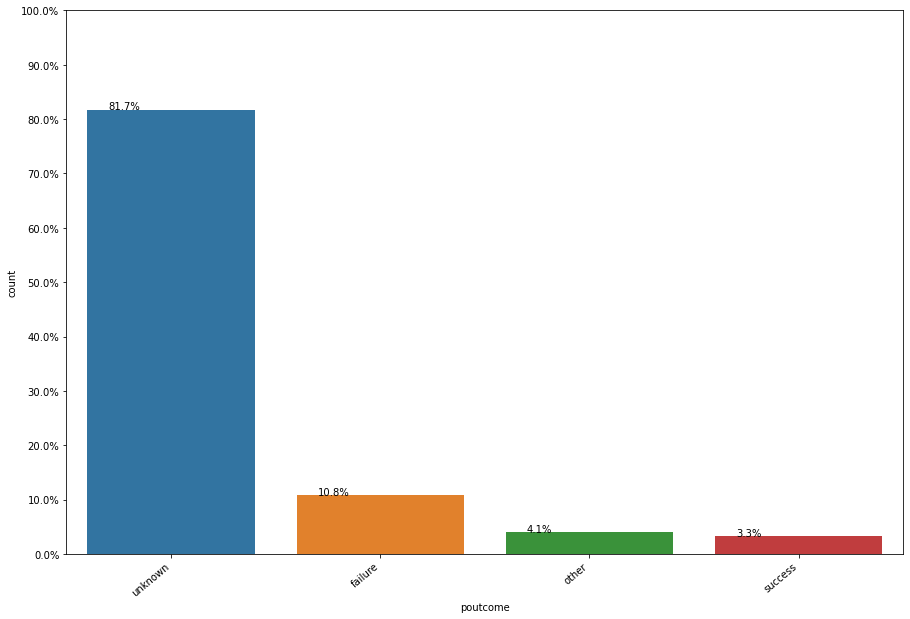

In [28]:
countplot("poutcome", df)

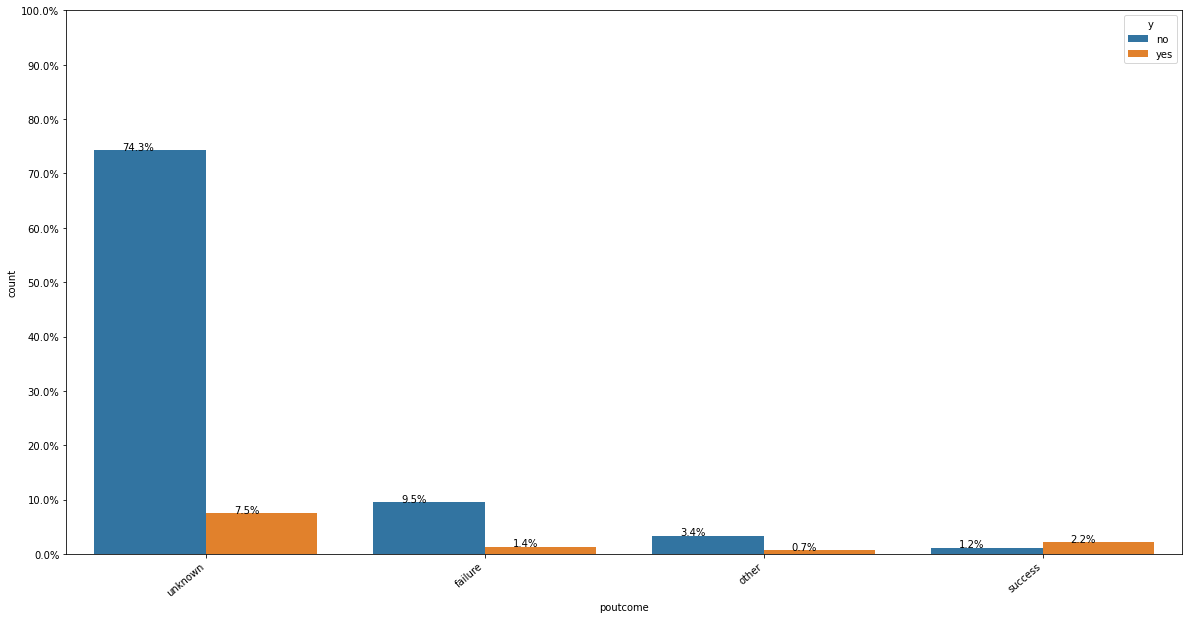

In [29]:
countplot_withY("poutcome", df)

### Univariate Analysis of Numeric Variables

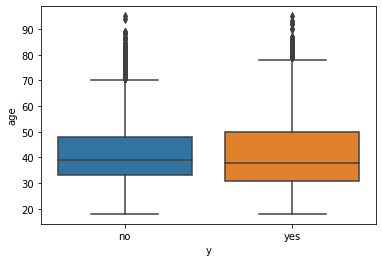

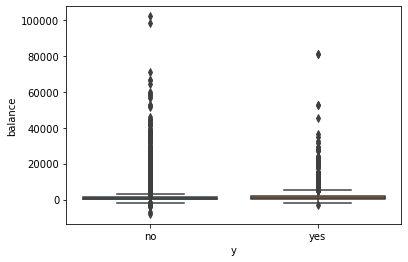

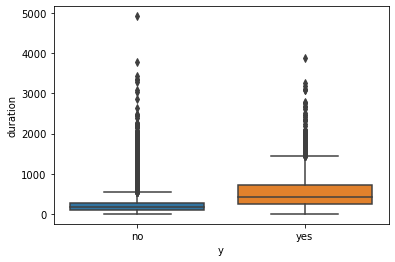

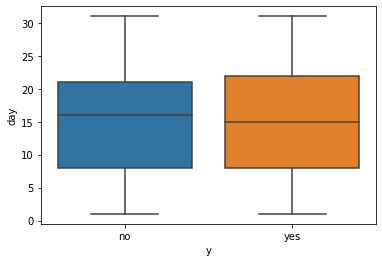

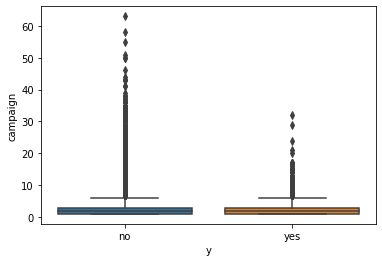

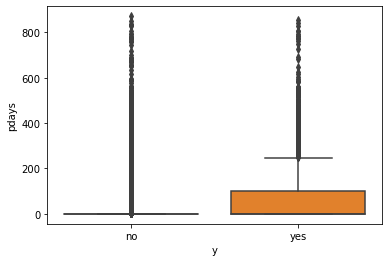

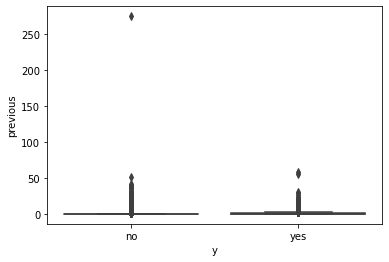

In [30]:
#Exploratory Data Analysis
#for numerical variable
y1 = df['y']
num_var = ["age","balance","duration","day","campaign", "pdays", "previous"]

for i in num_var:
  sns.boxplot(x = y1,y = i,data = df)
  plt.show();

For both category of customers the median age is about 38-40. Boxplot for both the classes overlap quite a lot, which means that age isn't necessarily a good indicator for classifying customer.

As per above distribution, that most of the customers are in the age range of 30-40.

Duration (last contact duration) of a customer can be useful for predicting the target variable.

In [31]:
df["pdays"].unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [32]:
df["pdays"].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

There are 36,954 cases of -1, which means that the most of the customers have never been contacted before.

In [33]:
df["previous"].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41], dtype=int64)

In [34]:
df["previous"].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

In [35]:
df[df["y"]=="yes"]["previous"].value_counts()

0     3384
1      583
2      456
3      294
4      171
5      121
6       83
7       54
8       39
10      26
9       24
11      15
12      10
13       9
14       5
17       3
19       2
20       1
15       1
58       1
30       1
21       1
29       1
23       1
22       1
26       1
55       1
Name: previous, dtype: int64

In [36]:
df[df["y"]=="no"]["previous"].value_counts()

0      33570
1       2189
2       1650
3        848
4        543
5        338
6        194
7        151
8         90
9         68
11        50
10        41
12        34
13        29
15        19
14        14
16        13
17        12
19         9
23         7
20         7
18         6
27         5
24         5
22         5
25         4
21         3
29         3
38         2
37         2
28         2
30         2
40         1
41         1
275        1
51         1
35         1
26         1
32         1
Name: previous, dtype: int64

## Correlation matrix of numerical features

Text(0.5, 1.05, 'Pearson correlation of Features')

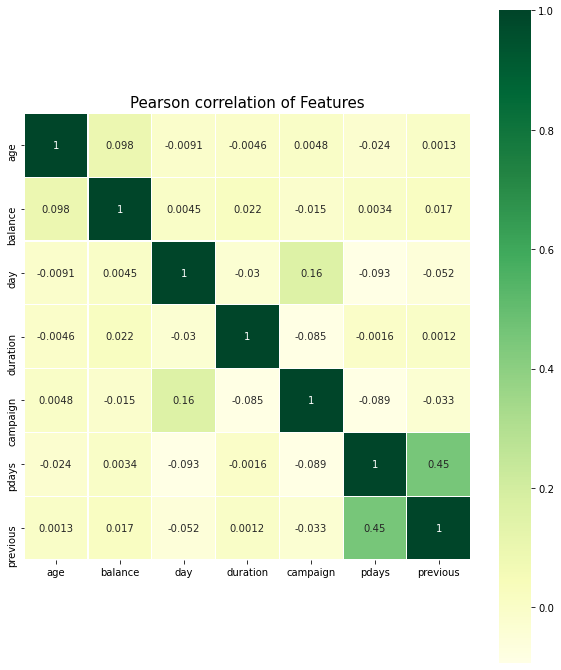

In [37]:
%matplotlib inline
corr = df.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

There is a very weak correlation between features. The highest correlation is 0.45 between pdays and previouos features. 

In [38]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

## Change output  variable to int , as it is a requirement by the skitlearn algorithm 

In [39]:
# Replace "no" with 0 and "yes" with 1
df["y"].replace(["yes","no"],[1,0], inplace=True)

In [40]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

## One Hot Encoding Categorical features

In [41]:
dummies = pd.get_dummies(df[['job','marital', 'education','default','housing','loan','contact','month','poutcome']])

In [42]:
# Drop columns for which we created dummy variables
X_ = df.drop(['job', 'marital', 'education','default','housing','loan','contact','month','poutcome'], axis=1).astype('float64')

In [43]:
# Define the feature set X.
df_new = pd.concat([dummies,X_], axis=1)
df_new.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous,y
0,0,0,0,0,1,0,0,0,0,0,...,0,1,58.0,2143.0,5.0,261.0,1.0,-1.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,1,...,0,1,44.0,29.0,5.0,151.0,1.0,-1.0,0.0,0.0
2,0,0,1,0,0,0,0,0,0,0,...,0,1,33.0,2.0,5.0,76.0,1.0,-1.0,0.0,0.0
3,0,1,0,0,0,0,0,0,0,0,...,0,1,47.0,1506.0,5.0,92.0,1.0,-1.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,33.0,1.0,5.0,198.0,1.0,-1.0,0.0,0.0


## Separate inpedendent and target variables


In [44]:
data_X = df_new.iloc[:,:-1]
print("Shape of X:",data_X.shape)
data_y = df_new["y"]
print("Shape of Y:", data_y.shape)

Shape of X: (45211, 51)
Shape of Y: (45211,)


## Train Test split

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.25, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (33908, 51) (33908,)
Test set: (11303, 51) (11303,)


## Normalize Data

In [46]:
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

scaler = StandardScaler()

normalized_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)


## Modeling (Logistic Regression with Scikit-learn)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear' , class_weight='balanced').fit(normalized_X_train,y_train)

normalized_X_test= pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

yhat= LR.predict(normalized_X_test)
yhat_proba = LR.predict_proba(normalized_X_test)

## Evaluation

In [48]:
from sklearn.metrics import roc_auc_score
print("AUC Score with Duration Variable: ", roc_auc_score(y_test, yhat_proba[:,1]))

AUC Score with Duration Variable:  0.9066166088219756


## Drop Duration Variable

In [49]:
X_train = X_train.drop("duration", axis=1)
print("The shape of the train dataset: ", X_train.shape)

X_test = X_test.drop("duration", axis=1)
print("The shape of the test dataset: ", X_test.shape)

The shape of the train dataset:  (33908, 50)
The shape of the test dataset:  (11303, 50)


## Fit the model without Duration Variable

In [50]:
normalized_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
LR2 = LogisticRegression(C=0.01, solver='liblinear',class_weight='balanced').fit(normalized_X_train,y_train)
normalized_X_test= pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
yhat= LR2.predict(normalized_X_test)
yhat_proba = LR2.predict_proba(normalized_X_test)
pred_train = LR2.predict_proba(normalized_X_train)

print("AUC score without Duration on Test Dataset ", roc_auc_score(y_test, yhat_proba[:,1]))
print("AUC score without Duration on Train Dataset ", roc_auc_score(y_train, pred_train[:,1]))



AUC score without Duration on Test Dataset  0.7694305359532508
AUC score without Duration on Train Dataset  0.7687110382401667


## Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [52]:
decisionTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [53]:
predTree_proba = decisionTree.predict_proba(X_test)

In [54]:
from sklearn.metrics import roc_auc_score
print("AUC Score", roc_auc_score(y_test, predTree_proba[:,1]))


AUC Score 0.7177910278223899


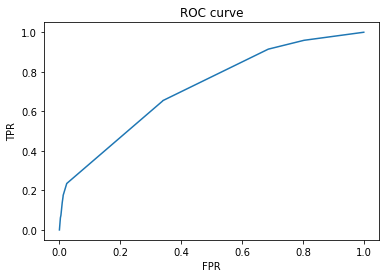

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

fpr, tpr, _ = roc_curve(y_test, predTree_proba[:,1])

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## Decision Tree - Hyperparameter Tuning 

max_depth: (default = None) the maximum number of layers your tree will have. When None, the layers will continue until a pure split is achieved or another min/max parameter is achieved.

min_samples_split: (default = 2) the minimum number of samples in an internal node that allows for a split to occur. If a node has less than this number if becomes a leaf (terminal node).

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1,2,3,4,5,10,50,100,500,1000]
min_samples =  [2,5,10, 100, 500]
param_grid={'min_samples_split':min_samples , 'max_depth':dept}
clf = DecisionTreeClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(X_train,y_train)
print("optimal min_samples_split",model.best_estimator_.min_samples_split)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal min_samples_split 500
optimal max_depth 100


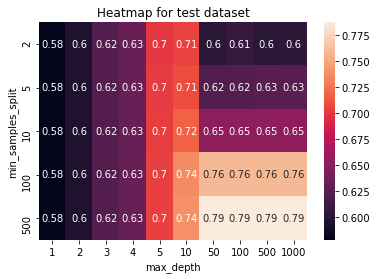

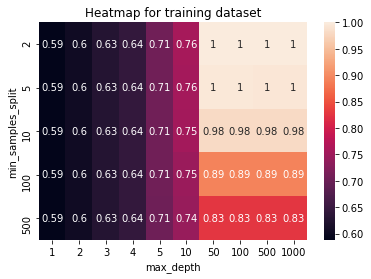

In [57]:
import seaborn as sns
X = []
Y = []
cv_auc = []
train_auc = []
for n in min_samples:
    for d in dept:
        clf = DecisionTreeClassifier(max_depth = d,min_samples_split = n)
        clf.fit(X_train,y_train)
        pred_cv = clf.predict_proba(X_test)[:,1]
        pred_train = clf.predict_proba(X_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(y_test,pred_cv))
        train_auc.append(roc_auc_score(y_train,pred_train))
        
#Heatmap for cross validation data        
data = pd.DataFrame({'min_samples_split': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data.pivot("min_samples_split", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for test dataset')
plt.show()

#Heatmap for training data
data = pd.DataFrame({'min_samples_split': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data.pivot("min_samples_split", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training dataset')
plt.show()


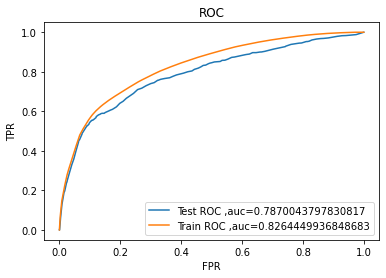

AUC on Test data is 0.7870043797830817
AUC on Train data is 0.8264449936848683
---------------------------


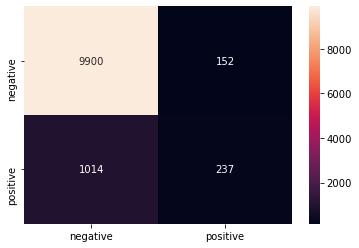

In [58]:
#training our model for max_depth=100,min_samples_split=500
import sklearn.metrics as metrics
clf = DecisionTreeClassifier(max_depth = 100,min_samples_split = 500)
clf.fit(X_train,y_train)
pred_test =clf.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(X_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred_train)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test, pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test, pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

## Random Forest



In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]

param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = RandomForestClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(X_train,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal n_estimators 60
optimal max_depth 10


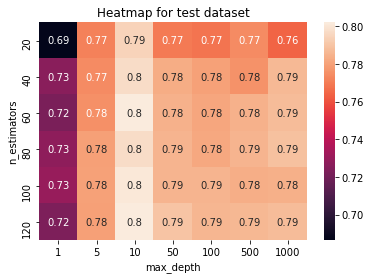

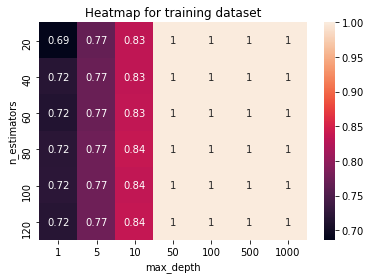

In [60]:
import seaborn as sns
X = []
Y = []
cv_auc = []
train_auc = []
for n in n_estimators:
    for d in dept:
        clf = RandomForestClassifier(max_depth = d,n_estimators = n)
        clf.fit(X_train,y_train)
        pred_cv = clf.predict_proba(X_test)[:,1]
        pred_train = clf.predict_proba(X_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(y_test,pred_cv))
        train_auc.append(roc_auc_score(y_train,pred_train))
        
#Heatmap for cross validation data        
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for test dataset')
plt.show()

#Heatmap for training data
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training dataset')
plt.show()


In [61]:
optimal_n_estimators = model.best_estimator_.n_estimators
optimal_max_depth = model.best_estimator_.max_depth

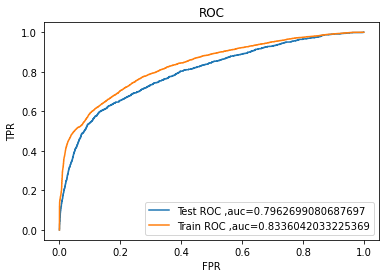

AUC on Test data is 0.7962699080687697
AUC on Train data is 0.8336042033225369
---------------------------


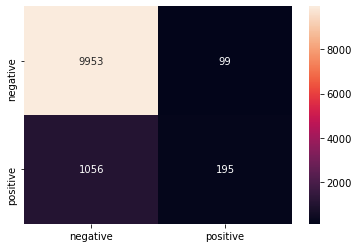

In [62]:
#training our model for max_depth=10,n_estimators = 120
clf = RandomForestClassifier(max_depth = optimal_max_depth,n_estimators = optimal_n_estimators)
clf.fit(X_train,y_train)
pred_test =clf.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(X_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred_train)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

## Important features

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [64]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
poutcome_success,0.287619
pdays,0.084730
age,0.069492
housing_no,0.056303
previous,0.052091


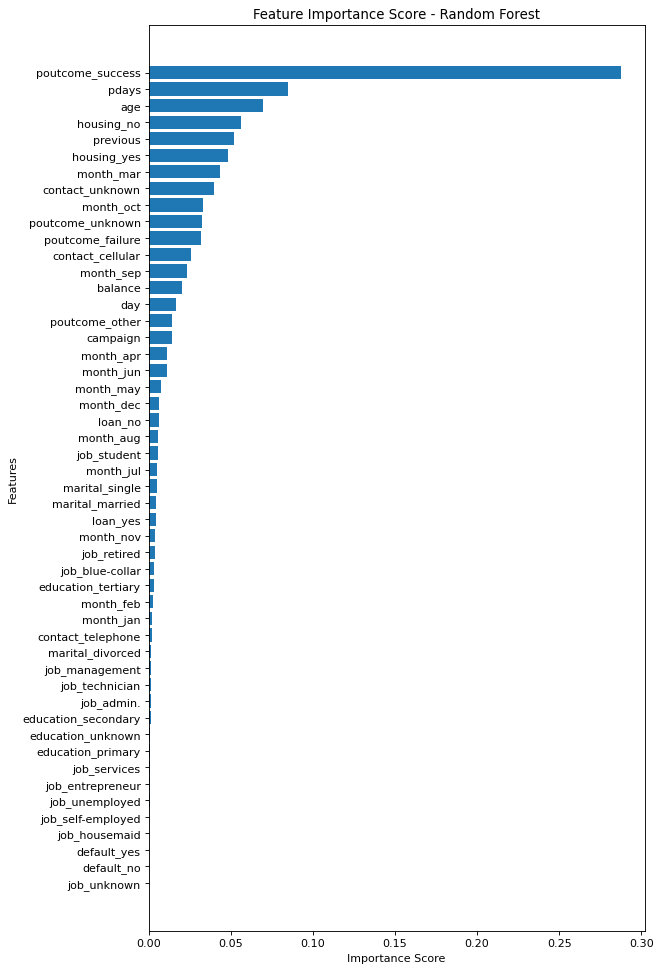

In [65]:
num = np.min([50, len(X_train.columns)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()


In [66]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [67]:
feature_importances = pd.DataFrame(tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
poutcome_success,0.371177
age,0.101809
pdays,0.071138
balance,0.065152
month_mar,0.052055


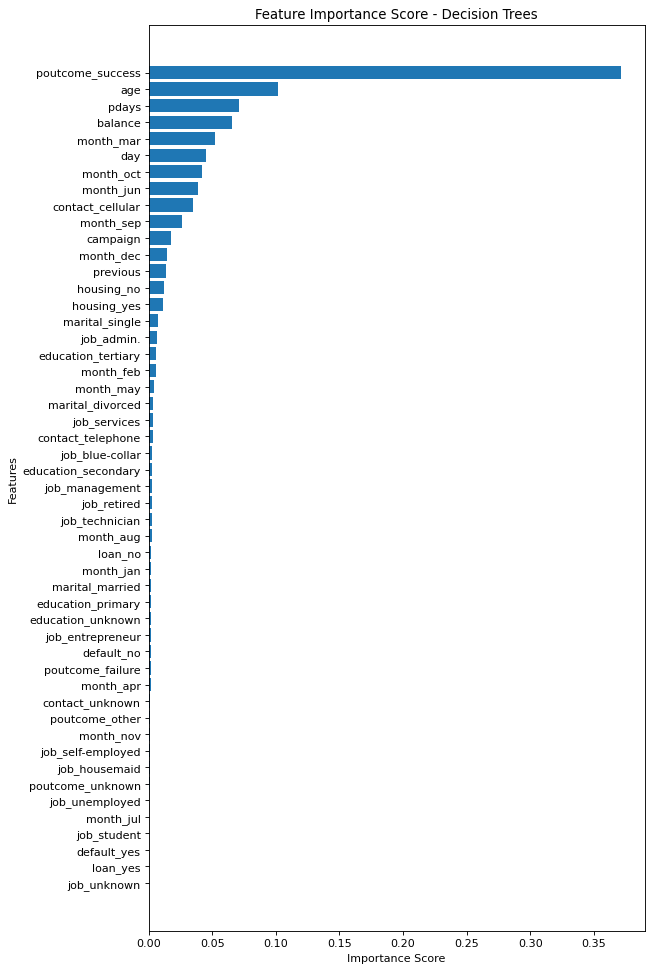

In [68]:
num = np.min([50, len(X_train.columns)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Decision Trees')
plt.yticks(ylocs, feature_labels)
plt.show()

## Table of Results

In [69]:
results=pd.DataFrame(columns=['Model', 'Classifier' ,"Hyper Parameter", 'Train-AUC', 'Test-AUC' ])

In [70]:
results.loc[0] = ['Logistic Regression','LogisticRegression',"C=0.01",0.7687,0.7694]
results.loc[1] = ['Decision Tree','DecisionTreeClassifier',"max_depth = 100 & min_samples_split = 500",0.8264,0.7869]
results.loc[2] = ['Random Forest','RandomForestClassifier',"max_depth = 10 & min_samples_split = 120",0.8396, 0.8025]
results


,Model,Classifier,Hyper Parameter,Train-AUC,Test-AUC
0,Logistic Regression,LogisticRegression,C=0.01,0.7687,0.7694
1,Decision Tree,DecisionTreeClassifier,max_depth = 100 & min_samples_split = 500,0.8264,0.7869
2,Random Forest,RandomForestClassifier,max_depth = 10 & min_samples_split = 120,0.8396,0.8025


## References:
Beucher, A., Moller, A. & Greve, M. (2017), `Artificial neural networks and decision tree classification for predicting soil drainage classes in denmark', Geoderma

Friedman, J., Hastie, T. & Tibshirani, R. (2001), The elements of statistical learning, Vol. 1,
Springer series in statistics New York.

Grzonka, D., et al. (2016). "Application of selected supervised classification methods to bank marketing campaign." Information Systems in Management 5(1): 36-48.

Moro, S., et al. (2011). "Using data mining for bank direct marketing: An application of the crisp-dm methodology."

Moro, S., et al. (2014). "A data-driven approach to predict the success of bank telemarketing." Decision Support Systems 62: 22-31.